In [25]:
import pandas as pd
df = pd.read_csv('./data/user_activity_data.csv')

# Inspect the data
print(df.head())

                        _id                    userId  \
0  672ba1f948ab89a79881e0c8  67189a704f4eed52a1cfb7ae   
1  672ba1f948ab89a79881e0c9  67189a704f4eed52a1cfb7ae   
2  672ba1f948ab89a79881e0ca  67189a704f4eed52a1cfb7ae   
3  672ba1f948ab89a79881e0cb  67189a704f4eed52a1cfb7ae   
4  672ba1f948ab89a79881e0cc  67189a704f4eed52a1cfb7ae   

                      date  waterIntake  calorieIntake  sleepDuration  \
0  2023-11-06 17:06:01.440         4394           2417              6   
1  2023-11-07 17:06:01.440         3442           3773              5   
2  2023-11-08 17:06:01.440         2320           2718              5   
3  2023-11-09 17:06:01.440         1916           1760              7   
4  2023-11-10 17:06:01.440         3487           1833              6   

   dailySteps fastingOption  isFastingAdhered  fastingDeviation  \
0        8313          16:8             False                 0   
1       12946          16:8             False                 0   
2        7137    

In [26]:
df.columns

Index(['_id', 'userId', 'date', 'waterIntake', 'calorieIntake',
       'sleepDuration', 'dailySteps', 'fastingOption', 'isFastingAdhered',
       'fastingDeviation', 'createdAt', 'fastingStartTime', 'fastingEndTime',
       '__v', 'updatedAt'],
      dtype='object')

In [27]:
columns_to_keep = ['userId', 'date', 'waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']
df_cleaned = df[columns_to_keep]

# Check the first few rows to ensure data is cleaned correctly
print(df_cleaned.head())

                     userId                     date  waterIntake  \
0  67189a704f4eed52a1cfb7ae  2023-11-06 17:06:01.440         4394   
1  67189a704f4eed52a1cfb7ae  2023-11-07 17:06:01.440         3442   
2  67189a704f4eed52a1cfb7ae  2023-11-08 17:06:01.440         2320   
3  67189a704f4eed52a1cfb7ae  2023-11-09 17:06:01.440         1916   
4  67189a704f4eed52a1cfb7ae  2023-11-10 17:06:01.440         3487   

   calorieIntake  sleepDuration  dailySteps  
0           2417              6        8313  
1           3773              5       12946  
2           2718              5        7137  
3           1760              7       10632  
4           1833              6       13041  


In [28]:
# df_cleaned.to_csv('./data/user_activity_cleaned.csv', index=False)

print("Data has been successfully cleaned and saved to 'user_activity_cleaned.csv'")

Data has been successfully cleaned and saved to 'user_activity_cleaned.csv'


In [29]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df = pd.read_csv('./data/user_activity_cleaned.csv')

df['date'] = pd.to_datetime(df['date'])

print(df.isnull().sum())

df = df.dropna()


df['day_of_week'] = df['date'].dt.dayofweek  

df = df.drop('date', axis=1)

scaler = MinMaxScaler()
df[['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']] = scaler.fit_transform(
    df[['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']]
)

print(df.head())

# Save the preprocessed data (optional)
# df.to_csv('./data/user_activity_preprocessed.csv', index=False)

userId           0
date             0
waterIntake      0
calorieIntake    0
sleepDuration    0
dailySteps       0
dtype: int64
                     userId  waterIntake  calorieIntake  sleepDuration  \
0  67189a704f4eed52a1cfb7ae     0.883216       0.605158       0.857143   
1  67189a704f4eed52a1cfb7ae     0.691859       0.944667       0.714286   
2  67189a704f4eed52a1cfb7ae     0.466332       0.680521       0.714286   
3  67189a704f4eed52a1cfb7ae     0.385126       0.440661       1.000000   
4  67189a704f4eed52a1cfb7ae     0.700905       0.458938       0.857143   

   dailySteps  day_of_week  
0    0.593786            0  
1    0.924714            1  
2    0.509786            2  
3    0.759429            3  
4    0.931500            4  


In [62]:
df.describe()

,waterIntake,calorieIntake,sleepDuration,dailySteps,day_of_week,anomaly
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,0.564858,0.655004,0.826184,0.556291,2.892950,0.796345
std,0.251844,0.223402,0.197891,0.247578,2.030275,0.605634
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.362111,0.495869,0.714286,0.385929,1.000000,1.000000
50%,0.562010,0.658237,0.857143,0.563143,3.000000,1.000000
75%,0.790151,0.842013,1.000000,0.750964,5.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000


In [65]:
from sklearn.ensemble import IsolationForest
import pandas as pd

df = pd.read_csv('./data/user_activity_preprocessed.csv')

X = df[['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']]

contamination_level = 0.05
model = IsolationForest(contamination=contamination_level, random_state=42)
model.fit(X)


anomaly_scores = model.decision_function(X)  

threshold = np.percentile(anomaly_scores, 100 * contamination_level)

predicted_anomalies = anomaly_scores < threshold

detected_anomalies_ratio = np.mean(predicted_anomalies)

print(f"Expected anomaly ratio (contamination level): {contamination_level}")
print(f"Detected anomaly ratio: {detected_anomalies_ratio}")
df['anomaly'] = model.predict(X)


anomalous_index = df[df['anomaly'] == -1].index[2]  
print("Third anomaly index:", anomalous_index)




Expected anomaly ratio (contamination level): 0.05
Detected anomaly ratio: 0.05221932114882506
Third anomaly index: 148


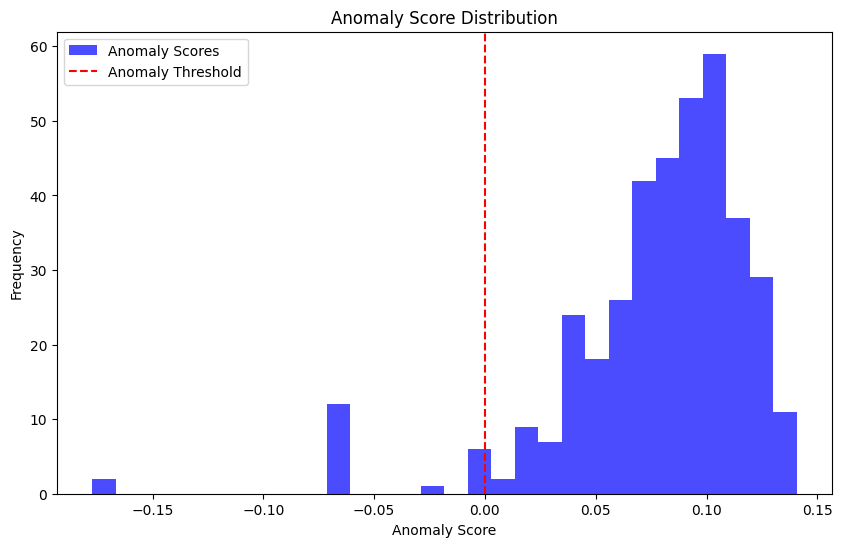

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=30, color='blue', alpha=0.7, label="Anomaly Scores")
plt.axvline(threshold, color='red', linestyle='--', label="Anomaly Threshold")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.title("Anomaly Score Distribution")
plt.legend()
plt.show()


userId           67189a704f4eed52a1cfb7ae
waterIntake                      0.889045
calorieIntake                    0.996244
sleepDuration                    0.857143
dailySteps                       0.199429
day_of_week                             5
anomaly                                -1
Name: 54, dtype: object


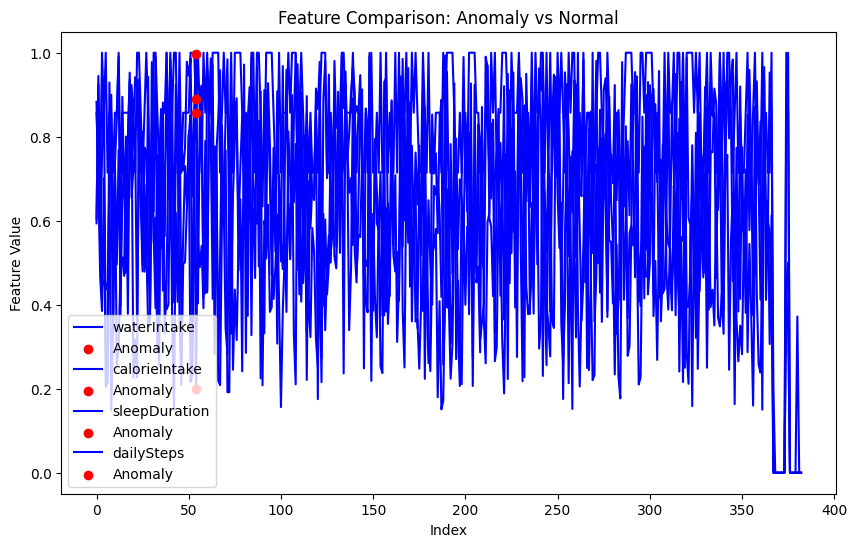

In [54]:
import matplotlib.pyplot as plt
anomalous_data = df.iloc[anomalous_index]
print(anomalous_data)
# Plot the features for the first anomaly
plt.figure(figsize=(10, 6))

# Plot each feature for the anomalous data point
features = ['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps']
for feature in features:
    plt.plot(df[feature], label=feature, color='blue')
    plt.scatter(anomalous_index, anomalous_data[feature], color='red', label='Anomaly', zorder=5)

plt.legend()
plt.title('Feature Comparison: Anomaly vs Normal')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.show()



In [67]:
import shap

explainer = shap.Explainer(model, X)

shap_values_for_anomaly = explainer.shap_values(X.iloc[anomalous_index])


if isinstance(shap_values_for_anomaly, list):
    shap_values_for_anomaly = shap_values_for_anomaly[0]

print("SHAP Values for Anomaly:", shap_values_for_anomaly)


feature_names = X.columns 

print(feature_names)

shap_values_df = pd.DataFrame(
    shap_values_for_anomaly.reshape(1, -1), columns=feature_names
)
print(shap_values_df)



SHAP Values for Anomaly: [ 0.19333295 -1.08755606 -0.33368519 -1.45285712]
Index(['waterIntake', 'calorieIntake', 'sleepDuration', 'dailySteps'], dtype='object')
   waterIntake  calorieIntake  sleepDuration  dailySteps
0     0.193333      -1.087556      -0.333685   -1.452857


In [68]:
import joblib
joblib.dump(model, "./data/isolation_forest_model.pkl")
joblib.dump(explainer, "./data/shap_explainer.pkl")

['./data/shap_explainer.pkl']

In [69]:
joblib.dump(scaler, './data/scaler.pkl')

['./data/scaler.pkl']

Index(['UserID', 'Date', 'Total_Distance', 'Tracker_Distance',
       'Logged_Activities_Distance', 'Very_Active_Distance',
       'Moderately_Active_Distance', 'Light_Active_Distance',
       'Sedentary_Active_Distance', 'Very_Active_Minutes',
       'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Sedentary_Minutes',
       'Steps', 'Calories_Burned'],
      dtype='object')